In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

print('Версия pandas:', pd.__version__)

Версия pandas: 2.1.4




# Поворот табличных данных (pivot)
## Сводные таблицы (pivot tables) в pandas
## «Широкий» и «длинный» формат таблицы (wide & long, Stacked & Record)
## Функции и методы pivot, pivot_table, crosstab, stack, unstack и melt.

    План урока
    
    Часть 1
    
    - Вспоминаем основы иерархического индексирования 
    - Создаем DataFrame с MultiIndex в строках и столбцах
    - Методы stack и unstack
    - Работа с отсутствующими значениями (NaN) в методах stack & unstack
    
    Часть 2
    
    - Форматы Stacked & Record 
    - Инструменты pivot и pivot_table и melt
    - Таблицы сопряженности pd.crosstab

# Часть 1. Иерархическое индексирование. Методы stack и unstack

In [2]:
# создаем рандомную матрицу из целых чисел 4x4 - данные для датафрейма
random_matrix = np.random.randint(750,1500, size=(8, 4))
# создаем мультииндекс для строк
city = ['Moscow', 'St.Petersburg']
birth_season = ['winter', 'spring', 'summer', 'autumn']
multi_product_1=pd.MultiIndex.from_product([city, birth_season], names=['city', 'birth_season'])
print(multi_product_1)
# создаем мультииндекс для строк
gender = ['M', 'F']
handedness = ['left', 'right']
multi_product_2=pd.MultiIndex.from_product([gender, handedness], names=['gender', 'handedness'])
print(multi_product_2)

#создаем датафрейм, используя заранее созданные матрицу и мультииндексы строк и столбцов
df_hand = pd.DataFrame(random_matrix, 
                       index=multi_product_1, 
                       columns=multi_product_2)
#сохраним датафрейм в файл
df_hand.to_csv('files/handedness')

display(df_hand)

MultiIndex([(       'Moscow', 'winter'),
            (       'Moscow', 'spring'),
            (       'Moscow', 'summer'),
            (       'Moscow', 'autumn'),
            ('St.Petersburg', 'winter'),
            ('St.Petersburg', 'spring'),
            ('St.Petersburg', 'summer'),
            ('St.Petersburg', 'autumn')],
           names=['city', 'birth_season'])
MultiIndex([('M',  'left'),
            ('M', 'right'),
            ('F',  'left'),
            ('F', 'right')],
           names=['gender', 'handedness'])


gender                         M           F      
handedness                  left right  left right
city          birth_season                        
Moscow        winter        1163  1405  1309  1263
              spring        1295  1331  1453  1023
              summer        1079   992  1338   750
              autumn        1493  1483   958  1328
St.Petersburg winter         966   888  1168  1491
              spring        1379  1146  1330   760
              summer         832   947  1229  1213
              autumn        1015  1391  1469  1359

In [3]:
# открываем сохраненный файл без дополнительных параметров
pd.read_csv('files/handedness')

,gender,Unnamed: 1,M,M.1,F,F.1
0,handedness,NaN,left,right,left,right
1,city,birth_season,NaN,NaN,NaN,NaN
2,Moscow,winter,1163,1405,1309,1263
3,Moscow,spring,1295,1331,1453,1023
4,Moscow,summer,1079,992,1338,750
5,Moscow,autumn,1493,1483,958,1328
6,St.Petersburg,winter,966,888,1168,1491
7,St.Petersburg,spring,1379,1146,1330,760
8,St.Petersburg,summer,832,947,1229,1213
9,St.Petersburg,autumn,1015,1391,1469,1359


In [4]:
# открываем сохраненный файл с дополнительными параметрами index_col и header
pd.read_csv('files/handedness', index_col=[0,1], header=[0,1])

gender                         M           F      
handedness                  left right  left right
city          birth_season                        
Moscow        winter        1163  1405  1309  1263
              spring        1295  1331  1453  1023
              summer        1079   992  1338   750
              autumn        1493  1483   958  1328
St.Petersburg winter         966   888  1168  1491
              spring        1379  1146  1330   760
              summer         832   947  1229  1213
              autumn        1015  1391  1469  1359

## 1. Изменение формы с помощью иерархического индексирования.

# Метод .stack()

    Это «поворот», который переносит данные из столбцов в строки
    Таблица становится "длиннее", т.е. появляется больше строк

## Пример 1.1.

In [5]:
df_hand.stack()

gender                                    M     F
city          birth_season handedness            
Moscow        winter       left        1163  1309
                           right       1405  1263
              spring       left        1295  1453
                           right       1331  1023
              summer       left        1079  1338
                           right        992   750
              autumn       left        1493   958
                           right       1483  1328
St.Petersburg winter       left         966  1168
                           right        888  1491
              spring       left        1379  1330
                           right       1146   760
              summer       left         832  1229
                           right        947  1213
              autumn       left        1015  1469
                           right       1391  1359

# Метод .unstack()

    Обратный поворот, который переносит данные из строк в столбцы
    Таблица становится "шире", т.е. появляется больше столбцов

## Пример 1.2

In [6]:
df_hand.unstack()

gender             M                                                       F  \
handedness      left                       right                        left   
birth_season  autumn spring summer winter autumn spring summer winter autumn   
city                                                                           
Moscow          1493   1295   1079   1163   1483   1331    992   1405    958   
St.Petersburg   1015   1379    832    966   1391   1146    947    888   1469   

gender                                                          
handedness                          right                       
birth_season  spring summer winter autumn spring summer winter  
city                                                            
Moscow          1453   1338   1309   1328   1023    750   1263  
St.Petersburg   1330   1229   1168   1359    760   1213   1491

## Пример 1.3

In [7]:
display(df_hand)

# указываем конкретный уровень для переноса

df_hand.stack(level=0)

# можем указать level='gender' вместо level=0, результат будет тот же
# df_hand.stack(level='gender')

gender                         M           F      
handedness                  left right  left right
city          birth_season                        
Moscow        winter        1163  1405  1309  1263
              spring        1295  1331  1453  1023
              summer        1079   992  1338   750
              autumn        1493  1483   958  1328
St.Petersburg winter         966   888  1168  1491
              spring        1379  1146  1330   760
              summer         832   947  1229  1213
              autumn        1015  1391  1469  1359

handedness                         left  right
city          birth_season gender             
Moscow        winter       F       1309   1263
                           M       1163   1405
              spring       F       1453   1023
                           M       1295   1331
              summer       F       1338    750
                           M       1079    992
              autumn       F        958   1328
                           M       1493   1483
St.Petersburg winter       F       1168   1491
                           M        966    888
              spring       F       1330    760
                           M       1379   1146
              summer       F       1229   1213
                           M        832    947
              autumn       F       1469   1359
                           M       1015   1391

## Пример 1.4

In [8]:
# можем передать список уровней для переноса
df_hand.stack(level=[0,1])

# df_hand.stack(level=['gender','handedness']) - другой вариант записи
# на выходе получаем серию с иерархическим индексом с 4-мя уровнями ('city, 'birth_season', 'gender', 'handedness')
# это то же самое, что дважды применить метод .stack() - df_hand.stack().stack()

city           birth_season  gender  handedness
Moscow         winter        F       left          1309
                                     right         1263
                             M       left          1163
                                     right         1405
               spring        F       left          1453
                                     right         1023
                             M       left          1295
                                     right         1331
               summer        F       left          1338
                                     right          750
                             M       left          1079
                                     right          992
               autumn        F       left           958
                                     right         1328
                             M       left          1493
                                     right         1483
St.Petersburg  winter        F       left          1168


## Пример 1.5

In [9]:
# порядок уровней в переданном списке конечно же имеет значение
df_hand.stack(level=[1,0])

city           birth_season  handedness  gender
Moscow         winter        left        M         1163
                                         F         1309
                             right       M         1405
                                         F         1263
               spring        left        M         1295
                                         F         1453
                             right       M         1331
                                         F         1023
               summer        left        M         1079
                                         F         1338
                             right       M          992
                                         F          750
               autumn        left        M         1493
                                         F          958
                             right       M         1483
                                         F         1328
St.Petersburg  winter        left        M          966


## 2. Метод .stack(). Отсутствующие значения и аргумент dropna

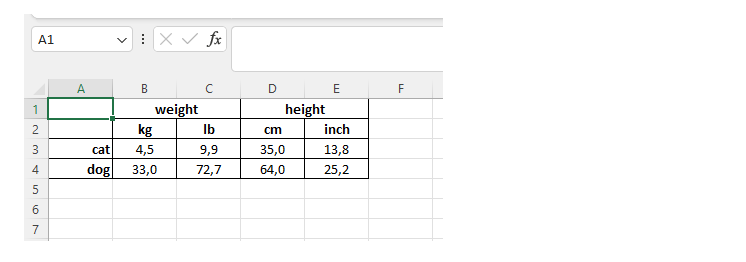

In [10]:
Image('files/cat_dog.png')

In [11]:
df_cd = pd.read_excel('files/cat_dog.xlsx', index_col=[0], header=[0,1])
df_cd

weight       height      
        kg    lb     cm  inch
cat    4.5   9.9     35  13.8
dog   33.0  72.7     64  25.2

## Пример 2.1

_После переноса уровня значения NaN будут встречаться в местах пересечения метки 'weight' (вес) с единицами измерения роста - сантиметры и дюймы, а также на пересечении метки 'height' (рост) с единицами  измерения веса (килограммы и фунты)._

In [12]:
# уровень индексов столбцов переместился в строки, но вместе с этим появились отсутствующие значения NaN
df_cd.stack()

weight  height
cat cm       NaN    35.0
    inch     NaN    13.8
    kg       4.5     NaN
    lb       9.9     NaN
dog cm       NaN    64.0
    inch     NaN    25.2
    kg      33.0     NaN
    lb      72.7     NaN

## Пример 2.2

In [13]:
# отсутующих значений нет потому что по умолчанию аргумент dropna стоит в позиции True
# то есть по умолчанию строки с отсутствующими значениями удаляются из результата
df_cd.stack(level=[0,1])

cat  height  cm      35.0
             inch    13.8
     weight  kg       4.5
             lb       9.9
dog  height  cm      64.0
             inch    25.2
     weight  kg      33.0
             lb      72.7
dtype: float64

## Пример 2.3

In [14]:
# по умолчанию dropna=True
df_cd.stack(level=[0,1], dropna=False)

cat  height  kg       NaN
             lb       NaN
             cm      35.0
             inch    13.8
     weight  kg       4.5
             lb       9.9
             cm       NaN
             inch     NaN
dog  height  kg       NaN
             lb       NaN
             cm      64.0
             inch    25.2
     weight  kg      33.0
             lb      72.7
             cm       NaN
             inch     NaN
dtype: float64

## 3. Метод .stack() - Случай, когда в изначальной структуре DataFrame есть отсутствующие значения

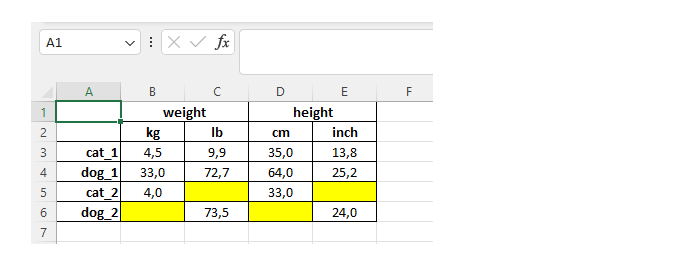

In [15]:
Image('files/cat_dog_nan.png')

In [16]:
df_cd_nan = pd.read_excel('files/cat_dog_nan.xlsx', index_col=[0], header=[0,1])
df_cd_nan

weight       height      
          kg    lb     cm  inch
cat_1    4.5   9.9   35.0  13.8
dog_1   33.0  72.7   64.0  25.2
cat_2    4.0   NaN   33.0   NaN
dog_2    NaN  73.5    NaN  24.0

## Пример 3.1

In [17]:
# в результате нет тех строк, где оба значения (weight и height) должны были оказаться NaN
df_cd_nan.stack()

weight  height
cat_1 cm       NaN    35.0
      inch     NaN    13.8
      kg       4.5     NaN
      lb       9.9     NaN
dog_1 cm       NaN    64.0
      inch     NaN    25.2
      kg      33.0     NaN
      lb      72.7     NaN
cat_2 cm       NaN    33.0
      kg       4.0     NaN
dog_2 inch     NaN    24.0
      lb      73.5     NaN

## Пример 3.2

In [18]:
# получаем все строки, даже те, что вовсе не содержат значений
df_cd_nan.stack(dropna=False)

weight  height
cat_1 cm       NaN    35.0
      inch     NaN    13.8
      kg       4.5     NaN
      lb       9.9     NaN
dog_1 cm       NaN    64.0
      inch     NaN    25.2
      kg      33.0     NaN
      lb      72.7     NaN
cat_2 cm       NaN    33.0
      inch     NaN     NaN
      kg       4.0     NaN
      lb       NaN     NaN
dog_2 cm       NaN     NaN
      inch     NaN    24.0
      kg       NaN     NaN
      lb      73.5     NaN

## Пример 3.3

In [19]:
# по умолчанию получаем серию без отсутствующих значений
df_cd_nan.stack(level=[0,1])

cat_1  height  cm      35.0
               inch    13.8
       weight  kg       4.5
               lb       9.9
dog_1  height  cm      64.0
               inch    25.2
       weight  kg      33.0
               lb      72.7
cat_2  height  cm      33.0
       weight  kg       4.0
dog_2  height  inch    24.0
       weight  lb      73.5
dtype: float64

## Пример 3.4

In [20]:
df_cd_nan.stack(level=[0,1], dropna=False)

cat_1  height  kg       NaN
               lb       NaN
               cm      35.0
               inch    13.8
       weight  kg       4.5
               lb       9.9
               cm       NaN
               inch     NaN
dog_1  height  kg       NaN
               lb       NaN
               cm      64.0
               inch    25.2
       weight  kg      33.0
               lb      72.7
               cm       NaN
               inch     NaN
cat_2  height  kg       NaN
               lb       NaN
               cm      33.0
               inch     NaN
       weight  kg       4.0
               lb       NaN
               cm       NaN
               inch     NaN
dog_2  height  kg       NaN
               lb       NaN
               cm       NaN
               inch    24.0
       weight  kg       NaN
               lb      73.5
               cm       NaN
               inch     NaN
dtype: float64

#### 1. Из результата удаляются абсолютно все отсутствующие значения: и те, что были в изначальной структуре DataFrame и те, что появились в процессе работы метода stack.

#### 2. Метод stack отсортировал метки перенесенных уровней в лексикографическом порядке. В выводе сначала стоит 'height', а потом только 'weight'. Если мы поставим аргумент sort в False, то получим неотсортированный индекс результирующей структуры.

## Пример 3.5

In [21]:
df_cd_nan.stack(level=[0,1], sort=False)

cat_1  weight  kg       4.5
               lb       9.9
       height  cm      35.0
               inch    13.8
dog_1  weight  kg      33.0
               lb      72.7
       height  cm      64.0
               inch    25.2
cat_2  weight  kg       4.0
       height  cm      33.0
dog_2  weight  lb      73.5
       height  inch    24.0
dtype: float64

## Пример 3.6

In [22]:
# не удаляет изначальные отсутствующие значения
# не сортирует метки перенесенных уровней

df_cd_nan.stack(level=[0,1], future_stack=True)

cat_1  weight  kg       4.5
               lb       9.9
       height  cm      35.0
               inch    13.8
dog_1  weight  kg      33.0
               lb      72.7
       height  cm      64.0
               inch    25.2
cat_2  weight  kg       4.0
               lb       NaN
       height  cm      33.0
               inch     NaN
dog_2  weight  kg       NaN
               lb      73.5
       height  cm       NaN
               inch    24.0
dtype: float64

#### Подробные разъяснения даны на странице документации
https://pandas.pydata.org/docs/whatsnew/v2.1.0.html#whatsnew-210-enhancements-new-stack

## 4. Метод unstack и отсутствующие значения

In [23]:
s_cd_nan=df_cd_nan.stack(level=[0,1], future_stack=True)
s_cd_nan_2=df_cd_nan.stack(level=[0,1])

display('Серия с изначально отсутствующими значениями (future_stack=True)', s_cd_nan, 
        'Серия с удаленными отсутствующими значениями (dropna - по умолчанию)', s_cd_nan_2)


'Серия с изначально отсутствующими значениями (future_stack=True)'

cat_1  weight  kg       4.5
               lb       9.9
       height  cm      35.0
               inch    13.8
dog_1  weight  kg      33.0
               lb      72.7
       height  cm      64.0
               inch    25.2
cat_2  weight  kg       4.0
               lb       NaN
       height  cm      33.0
               inch     NaN
dog_2  weight  kg       NaN
               lb      73.5
       height  cm       NaN
               inch    24.0
dtype: float64

'Серия с удаленными отсутствующими значениями (dropna - по умолчанию)'

cat_1  height  cm      35.0
               inch    13.8
       weight  kg       4.5
               lb       9.9
dog_1  height  cm      64.0
               inch    25.2
       weight  kg      33.0
               lb      72.7
cat_2  height  cm      33.0
       weight  kg       4.0
dog_2  height  inch    24.0
       weight  lb      73.5
dtype: float64

## Пример 4.1

In [24]:
# отличается только сортировка меток

display(s_cd_nan.unstack(level=[1,2]),
        s_cd_nan_2.unstack(level=[1,2]))

weight       height      
          kg    lb     cm  inch
cat_1    4.5   9.9   35.0  13.8
dog_1   33.0  72.7   64.0  25.2
cat_2    4.0   NaN   33.0   NaN
dog_2    NaN  73.5    NaN  24.0

height       weight      
          cm  inch     kg    lb
cat_1   35.0  13.8    4.5   9.9
cat_2   33.0   NaN    4.0   NaN
dog_1   64.0  25.2   33.0  72.7
dog_2    NaN  24.0    NaN  73.5

## Пример 4.2

In [25]:
# использование с fill_value
# при одинаковых параметрах метода unstack мы получили разные результаты в части замен значений

display(s_cd_nan.unstack(level=[1,2], fill_value='no'),
        s_cd_nan_2.unstack(level=[1,2], fill_value='no'))

weight       height      
          kg    lb     cm  inch
cat_1    4.5   9.9   35.0  13.8
dog_1   33.0  72.7   64.0  25.2
cat_2    4.0   NaN   33.0   NaN
dog_2    NaN  73.5    NaN  24.0

height       weight      
          cm  inch     kg    lb
cat_1   35.0  13.8    4.5   9.9
cat_2   33.0    no    4.0    no
dog_1   64.0  25.2   33.0  72.7
dog_2     no  24.0     no  73.5

## Пример 4.3

In [26]:
# Создаем копию серии s_cd_nan_2 и одно из значений серии заменяем на NaN

s_cd_nan_3=s_cd_nan_2.copy()
s_cd_nan_3.iloc[11]=np.nan
s_cd_nan_3

cat_1  height  cm      35.0
               inch    13.8
       weight  kg       4.5
               lb       9.9
dog_1  height  cm      64.0
               inch    25.2
       weight  kg      33.0
               lb      72.7
cat_2  height  cm      33.0
       weight  kg       4.0
dog_2  height  inch    24.0
       weight  lb       NaN
dtype: float64

In [27]:
s_cd_nan_3.unstack(level=[1,2], fill_value='no')

height       weight      
          cm  inch     kg    lb
cat_1   35.0  13.8    4.5   9.9
cat_2   33.0    no    4.0    no
dog_1   64.0  25.2   33.0  72.7
dog_2     no  24.0     no   NaN